● name: the user's name
● object_id: the user's id
● email: email address
● creation_source: how their account was created. This takes on one
of 5 values:
    ○ PERSONAL_PROJECTS: invited to join another user's
    personal workspace
    ○ GUEST_INVITE: invited to an organization as a guest
    (limited permissions)
    ○ ORG_INVITE: invited to an organization (as a full member)
    ○ SIGNUP: signed up via the website
    ○ SIGNUP_GOOGLE_AUTH: signed up using Google
    Authentication (using a Google email account for their login
    id)
● creation_time: when they created their account
● last_session_creation_time: unix timestamp of last login
● opted_in_to_mailing_list: whether they have opted into receiving
marketing emails
● enabled_for_marketing_drip: whether they are on the regular
marketing email drip
● org_id: the organization (group of users) they belong to
● invited_by_user_id: which user invited them to join (if applicable).

In [59]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
import sklearn.model_selection
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [6]:
logins=pd.read_csv('takehome_user_engagement.csv')
logins.head()


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
print(logins.info())
print(logins.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB
None
             user_id   visited
count  207917.000000  207917.0
mean     5913.314197       1.0
std      3394.941674       0.0
min         1.000000       1.0
25%      3087.000000       1.0
50%      5682.000000       1.0
75%      8944.000000       1.0
max     12000.000000       1.0


In [8]:
logins['time_stamp']=pd.to_datetime(logins['time_stamp'])
logins['day']=logins['time_stamp'].dt.dayofyear
logins
df=logins.set_index(logins['user_id'])
df

,time_stamp,user_id,visited,day
user_id,,,,
1,2014-04-22 03:53:30,1,1,112
2,2013-11-15 03:45:04,2,1,319
2,2013-11-29 03:45:04,2,1,333
2,2013-12-09 03:45:04,2,1,343
2,2013-12-25 03:45:04,2,1,359
...,...,...,...,...
11996,2013-09-06 06:14:15,11996,1,249
11997,2013-01-15 18:28:37,11997,1,15
11998,2014-04-27 12:45:16,11998,1,117


In [9]:
df_1=pd.DataFrame(df['day'])
x=df_1.value_counts().sum()
#print(df_1)
print(x)

207917


In [10]:
def three_in(list_v): 
    sum_diff=False
    if len(list_v)==3:       
        for i in range(1,len(list_v)):  
            a=list_v[i]-list_v[i-1]
            sum_diff+=abs(a)
        if (sum_diff<=7):
            #print(sum_diff)
            return True
        else:
            return False
    else:
        return False

j=[34, 39, 40]
print(three_in(j))

True


In [11]:
df_result = pd.DataFrame(columns=['id_1','adopted'])
print(df_result.columns)
df_result

Index(['id_1', 'adopted'], dtype='object')


,id_1,adopted


In [12]:

df_r=pd.DataFrame(columns=['id_1','adopted'])
#xz=pd.Series(data={'id_1':'2', 'adopted':'False'})
xx={'id_1':'2', 'adopted':'False'}
df_r=df_r.append(xx, ignore_index=True)
df_r

,id_1,adopted
0,2,False


In [13]:
df_2=df_1.head(25)
#print(df_2)
df_result = pd.DataFrame(columns=['id_1','adopted'])

prev_id = None
active_found = False
for window in df_1.groupby('user_id')['day'].rolling(3):
    #df_result['adopted']=three_in(window)
    #print("--------------")
    window_as_list = list(window.iteritems())
    cur_id = window_as_list[0][0]
    #print(cur_id)
    window_list = [ i[1] for i in window_as_list]
    if three_in(window_list)==True:
        active_found=True 
        #print(cur_id, "true")
    #print(active_found)       
    #print(window_list)
    if prev_id is not None:
        if prev_id != cur_id:
            df_result=df_result.append({'id_1':prev_id,'adopted':active_found}, ignore_index=True)  
            active_found = False
    prev_id = cur_id    
    #elif cur_id>=len(df_2.groupby('user_id')['day']):
    #print("here")
    #print(active_found)
df_result=df_result.append({'id_1':cur_id,'adopted':active_found}, ignore_index=True) 
       
print(df_result)
#window_as_list[-1][0]

       id_1 adopted
0         1   False
1         2    True
2         3   False
3         4   False
4         5   False
...     ...     ...
8818  11996   False
8819  11997   False
8820  11998   False
8821  11999   False
8822  12000   False

[8823 rows x 2 columns]


In [14]:
df_result.info()
df_result.adopted.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id_1     8823 non-null   object
 1   adopted  8823 non-null   object
dtypes: object(2)
memory usage: 138.0+ KB


False    7167
True     1656
Name: adopted, dtype: int64

In [15]:
users=pd.read_csv('takehome_users.csv')
users.head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [17]:
users.object_id

0            1
1            2
2            3
3            4
4            5
         ...  
11995    11996
11996    11997
11997    11998
11998    11999
11999    12000
Name: object_id, Length: 12000, dtype: int64

In [18]:
users_adopted=pd.merge(users,df_result,how='inner',left_on=['object_id'],right_on=['id_1'])
users_adopted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   8823 non-null   object 
 1   creation_time               8823 non-null   object 
 2   name                        8823 non-null   object 
 3   email                       8823 non-null   object 
 4   creation_source             8823 non-null   object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    8823 non-null   int64  
 7   enabled_for_marketing_drip  8823 non-null   int64  
 8   org_id                      8823 non-null   int64  
 9   invited_by_user_id          4776 non-null   float64
 10  id_1                        8823 non-null   object 
 11  adopted                     8823 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 896.1+ KB


In [19]:
users_adopted.describe()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,8.823000e+03,8823.000000,8823.000000,8823.000000,4776.000000
mean,1.379279e+09,0.252295,0.151989,142.572254,5980.495394
std,1.953116e+07,0.434354,0.359031,124.176422,3394.211361
min,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,1.363195e+09,0.000000,0.000000,30.000000,3071.000000
50%,1.382888e+09,0.000000,0.000000,109.000000,5947.000000
75%,1.398443e+09,1.000000,0.000000,239.000000,8857.250000
max,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [20]:
users_adopted.isnull().sum()
#invited_by_user_id may not be needed. I asked myself if this will matter to prediction, probably not.

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            4047
id_1                             0
adopted                          0
dtype: int64

In [21]:
pd.to_datetime(users_adopted.creation_time)

0      2014-04-22 03:53:30
1      2013-11-15 03:45:04
2      2013-03-19 23:14:52
3      2013-05-21 08:09:28
4      2013-01-17 10:14:20
               ...        
8818   2013-09-06 06:14:15
8819   2013-01-10 18:28:37
8820   2014-04-27 12:45:16
8821   2012-05-31 11:55:59
8822   2014-01-26 08:57:12
Name: creation_time, Length: 8823, dtype: datetime64[ns]

In [22]:
users_adopted.invited_by_user_id.nunique()
users_adopted.invited_by_user_id.value_counts()
users_adopted.invited_by_user_id.astype('str')
users_adopted.invited_by_user_id.fillna('0',inplace=True )
users_adopted.info()
#I will decide which features to use. The id columns , the email address (uniqe like id), and the users names will be dropped. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   8823 non-null   object 
 1   creation_time               8823 non-null   object 
 2   name                        8823 non-null   object 
 3   email                       8823 non-null   object 
 4   creation_source             8823 non-null   object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    8823 non-null   int64  
 7   enabled_for_marketing_drip  8823 non-null   int64  
 8   org_id                      8823 non-null   int64  
 9   invited_by_user_id          8823 non-null   object 
 10  id_1                        8823 non-null   object 
 11  adopted                     8823 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 896.1+ KB


In [23]:
#org_id is categorical
users_adopted.org_id=users_adopted.org_id.astype('str')
users_adopted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   8823 non-null   object 
 1   creation_time               8823 non-null   object 
 2   name                        8823 non-null   object 
 3   email                       8823 non-null   object 
 4   creation_source             8823 non-null   object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    8823 non-null   int64  
 7   enabled_for_marketing_drip  8823 non-null   int64  
 8   org_id                      8823 non-null   object 
 9   invited_by_user_id          8823 non-null   object 
 10  id_1                        8823 non-null   object 
 11  adopted                     8823 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 896.1+ KB


In [24]:
users_adopted.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'last_session_creation_time'}>,
        <AxesSubplot:title={'center':'opted_in_to_mailing_list'}>],
       [<AxesSubplot:title={'center':'enabled_for_marketing_drip'}>,
        <AxesSubplot:>]], dtype=object)

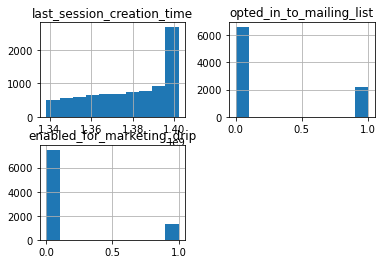

In [25]:
users_adopted.hist()

<AxesSubplot:>

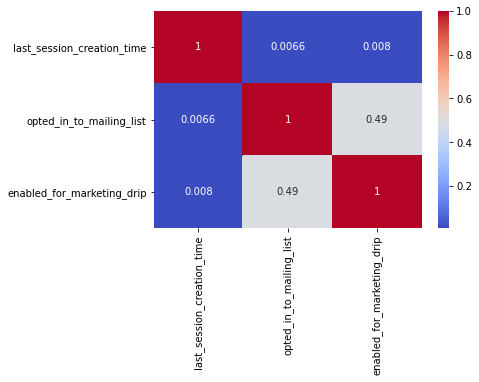

In [26]:
correlations=users_adopted.corr()
sns.heatmap(correlations, annot=True, cmap="coolwarm")
#opted into mailing list and enabled marketing drip are highly correlated.


In [27]:
# We have categorical features and they are also correlated.


In [29]:
#To choose the algorithms for this classification I was looking for model that can handle best categorical features 
#and also models that could handle colinearity of some features. This is because we don't have many features and cannot drop any.
#LASSO
#Ridge Regression
#desition tree
#logistic

In [ ]:
#scale the features to use in Lasso and Ridge is nececery.


In [30]:
#print(users_adopted.head())
users_adopted.creation_time=users_adopted.creation_time.astype('str')
users_adopted.creation_time
from pandas._libs.tslibs.parsing import guess_datetime_format

g=guess_datetime_format('2014-04-22 03:53:30')
g

from datetime import datetime

#print(users_adopted.creation_time)


creation_t=[]

for t in users_adopted.creation_time:
    utc_time = datetime.strptime(t, g)
    epoch_time = (utc_time - datetime(1970, 1, 1)).total_seconds()
    creation_t.append(epoch_time)
    
users_adopted['creation_t']=creation_t
users_adopted.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,id_1,adopted,creation_t
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,False,1.398139e+09
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,True,1.384487e+09
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3,False,1.363735e+09
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4,False,1.369124e+09
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5,False,1.358418e+09


In [31]:
columns_tm=users_adopted[['creation_t','last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip']]
categorical=users_adopted[['org_id','creation_source','invited_by_user_id']]


In [ ]:
#I had a thought to transform to improve model's power but we don't have real continuios features.

In [32]:
df = pd.concat([columns_tm, pd.get_dummies(categorical)], axis=1)
df

,creation_t,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id_0,org_id_1,org_id_10,org_id_100,org_id_101,org_id_102,...,invited_by_user_id_11966.0,invited_by_user_id_11972.0,invited_by_user_id_11973.0,invited_by_user_id_11978.0,invited_by_user_id_11981.0,invited_by_user_id_11986.0,invited_by_user_id_11994.0,invited_by_user_id_11997.0,invited_by_user_id_11999.0,invited_by_user_id_0
0,1.398139e+09,1.398139e+09,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.384487e+09,1.396238e+09,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.363735e+09,1.363735e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.369124e+09,1.369210e+09,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.358418e+09,1.358850e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8818,1.378448e+09,1.378448e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8819,1.357843e+09,1.358275e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8820,1.398603e+09,1.398603e+09,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8821,1.338465e+09,1.338638e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
X=df
y=users_adopted['adopted'].map({True:1,False:0 })
y

0       0
1       1
2       0
3       0
4       0
       ..
8818    0
8819    0
8820    0
8821    0
8822    0
Name: adopted, Length: 8823, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Columns: 2656 entries, creation_t to invited_by_user_id_0
dtypes: float64(2), int64(2), uint8(2652)
memory usage: 22.7 MB


In [35]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=24)

scaler=StandardScaler()
scaler.fit(X_train)
X_train_s=scaler.transform(X_train)
X_test_s=scaler.transform(X_test)

In [58]:
# We can first check the with simple classifier as a predictor and evaluate it.
dummy_c=DummyClassifier(strategy='most_frequent', random_state=24)
dummy_c.fit(X_train_s, y_train)
y_train_pred = dummy_c.predict(X_train_s)
y_test_pred=dummy_c.predict(X_test_s)
print(y_train_pred[:5])
dummy_c.score(X_train_s, y_train)

[0 0 0 0 0]


0.8080192689147068

In [265]:
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=24)
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
#search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(X_train_s, y_train)
results.best_estimator_

Lasso(alpha=0.01)

In [264]:
model=Lasso(alpha=0.01)
model.fit(X_train_s, y_train)
Lasso_pred=model.predict(X_test_s)
cv_Lscores_train_= cross_val_score(model ,X_train_s,y_train,cv=5,scoring='roc_auc')
cv_Lscores_test_= cross_val_score(model,X_test_s, y_test,cv=5,scoring='roc_auc')
cv_scores_Lasso_test_= cv_Lscores_test_.mean()
cv_scores_Lasso_train_= cv_Lscores_train_.mean()
print(cv_Lscores_test_)
print("cv mean train score", cv_scores_Lasso_train_)
print("cv mean test score", cv_scores_Lasso_test_)

[0.98310486 0.99366487 0.97840146 0.96552886 0.96595512]
cv mean train score 0.9770660437426599
cv mean test score 0.9773310337511282


In [293]:
#n_components = list(range(1, X.shape[1]+1 ,1))
model_tree=DecisionTreeClassifier(random_state=24)
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
min_samples_leaf=[2,4,6,8,10,12]
min_samples_split=[2,4,6,8,10,12]
parameters = dict(criterion=criterion, max_depth=max_depth, min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split )

search_tree = GridSearchCV(estimator=model_tree, scoring='roc_auc', cv=5, param_grid=parameters, n_jobs=-1)
results_tree = search_tree.fit(X_train_s, y_train)
results_tree.best_estimator_



DecisionTreeClassifier(max_depth=12, min_samples_leaf=12, random_state=24)

In [38]:
Tree=DecisionTreeClassifier(max_depth=12, min_samples_leaf=12, random_state=24)
Tree.fit(X_train_s, y_train)
Tree_pred=Tree.predict(X_test_s)
cv_Tscores_train_= cross_val_score(Tree ,X_train_s,y_train,cv=5,scoring='roc_auc')
cv_Tscores_test_= cross_val_score(Tree,X_test_s, y_test,cv=5,scoring='roc_auc')
cv_scores_Tree_test_= cv_Tscores_test_.mean()
cv_scores_Tree_train_= cv_Tscores_train_.mean()
print(cv_Tscores_test_)
print("cv mean train score", cv_scores_Tree_train_)
print("cv mean test score", cv_scores_Tree_test_)

[0.97494312 0.97093288 0.93717292 0.94903299 0.94896699]
cv mean train score 0.9744245276900854
cv mean test score 0.9562097799619691


In [63]:
Tree.feature_importances_
for importance, name in sorted(zip(Tree.feature_importances_, X_train.columns),reverse=True)[:5]:
    print (name, importance)

#PERSONAL_PROJECTS: invited to join another user'spersonal workspace
#last_session_creation_time: unix timestamp of last login

last_session_creation_time 0.6435231580688494
creation_t 0.3556580645293946
invited_by_user_id_0 0.0006752677189787522
creation_source_SIGNUP_GOOGLE_AUTH 5.5996913971512714e-05
creation_source_PERSONAL_PROJECTS 5.306900199238863e-05


In [ ]:
#The simple predictor can predict accuratly 80 % of the cases.Our simple models improved this ability to almost to 98%.
#The consideration would be what accuracy is expected or needed in this campany's project  for predicting adopted users.

In [287]:
model_tree.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])